В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import statsmodels.api as sm



# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [270]:
cars_df = pd.read_csv('../../data/cars.csv')
cars_df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [271]:
# приклад як викликати документацію, якщо у Вас pandas імпортований як pd
# ?pd.DataFrame.info

Подивимось які взагалі є колонки в датасеті і які в них типи даних

In [272]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


Виведемо окремо числові та категоріальні колонки

In [273]:
cars_df.select_dtypes(include='number').columns

Index(['Car_ID', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Seats', 'Price'],
      dtype='object')

In [274]:
cars_df.select_dtypes(include='object').columns


Index(['Brand', 'Model', 'Fuel_Type', 'Transmission', 'Owner_Type'], dtype='object')

Має мо 5 категоріальних колонок: `Brand`, `Model`, `Fuel_Type`, `Transmission`, `Owner_Type`.

Подивимось як виглядають дані в них та скільки унікальних значень в кожній з них

In [275]:
cars_df.select_dtypes(include='object')

,Brand,Model,Fuel_Type,Transmission,Owner_Type
0,Toyota,Corolla,Petrol,Manual,First
1,Honda,Civic,Petrol,Automatic,Second
2,Ford,Mustang,Petrol,Automatic,First
3,Maruti,Swift,Diesel,Manual,Third
4,Hyundai,Sonata,Diesel,Automatic,Second
...,...,...,...,...,...
95,Mercedes,C-Class,Diesel,Automatic,First
96,Toyota,Innova Crysta,Diesel,Manual,Second
97,Ford,EcoSport,Petrol,Manual,Third
98,Hyundai,Verna,Petrol,Automatic,Second


In [276]:
print(f'Колонка Brand має {cars_df.Brand.nunique()} унікальних значень:\n {cars_df.Brand.unique()}')

Колонка Brand має 11 унікальних значень:
 ['Toyota' 'Honda' 'Ford' 'Maruti' 'Hyundai' 'Tata' 'Mahindra' 'Volkswagen'
 'Audi' 'BMW' 'Mercedes']


In [277]:
print(f'Колонка Model має {cars_df.Model.nunique()} унікальних значень:\n {cars_df.Model.unique()}')


Колонка Model має 58 унікальних значень:
 ['Corolla' 'Civic' 'Mustang' 'Swift' 'Sonata' 'Nexon' 'Scorpio' 'Polo'
 'A4' 'X1' 'C-Class' 'Endeavour' 'Creta' 'Harrier' 'Ertiga' 'City'
 'Tiguan' 'Q3' '5 Series' 'GLC' 'Innova' 'Figo' 'Verna' 'Altroz' 'Thar'
 'Passat' 'A6' 'X3' 'E-Class' 'Fortuner' 'Aspire' 'Elantra' 'Safari'
 'Vitara' 'WR-V' 'Ameo' 'A3' '7 Series' 'GLE' 'Yaris' 'Ranger' 'Santro'
 'Tigor' 'S-Cross' 'BR-V' 'T-Roc' 'Q7' 'X5' 'GLA' 'Camry' 'Venue' 'Tiago'
 'XUV300' 'Vento' 'A5' '3 Series' 'Innova Crysta' 'EcoSport']


In [278]:
print(f'Колонка Fuel_Type має {cars_df.Fuel_Type.nunique()} унікальних значень:\n {cars_df.Fuel_Type.unique()}')


Колонка Fuel_Type має 2 унікальних значень:
 ['Petrol' 'Diesel']


In [279]:
print(f'Колонка Transmission має {cars_df.Transmission.nunique()} унікальних значень:\n {cars_df.Transmission.unique()}')


Колонка Transmission має 2 унікальних значень:
 ['Manual' 'Automatic']


In [280]:
print(f'Колонка Owner_Type має {cars_df.Owner_Type.nunique()} унікальних значень:\n {cars_df.Owner_Type.unique()}')


Колонка Owner_Type має 3 унікальних значень:
 ['First' 'Second' 'Third']


В наборі даних 8 числових і 5 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення) (`Fuel_Type`, `Transmission`)
- 2 мультикатегоріальні (більше 2х значень) зі значеннями, для яких немає відношення порядку (`Brand`, `Model`)
- 1 колонка, в якії можна встановити відношення порядку (наприклад Small<Medium<Large) (`Owner_Type`)

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [281]:
target = cars_df.Price
inputs = cars_df.drop('Price', axis=1)

In [282]:
X_train, X_test, Y_train, Y_test = train_test_split(inputs, target, test_size=0.2,  random_state=12)

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [283]:
# Кодування колонки Fuel_Type
X_train.Fuel_Type.value_counts()

Fuel_Type
Petrol    41
Diesel    39
Name: count, dtype: int64

In [284]:
fuel_type_codes = {'Diesel' : 0, 'Petrol' : 1}
X_train['Fuel_code'] = X_train.Fuel_Type.map(fuel_type_codes)
X_test['Fuel_code'] = X_test.Fuel_Type.map(fuel_type_codes)


In [285]:
# Кодування колонки Transmission
X_train.Transmission.value_counts()

Transmission
Automatic    49
Manual       31
Name: count, dtype: int64

In [286]:
transmission_codes = {'Manual' : 0, 'Automatic' : 1}
X_train['Transmission_code'] = X_train.Transmission.map(transmission_codes)
X_test['Transmission_code'] = X_test.Transmission.map(transmission_codes)


In [287]:
# Кодування колонки Brand
enc = OneHotEncoder().fit(X_train[['Brand']])
enc.categories_

[array(['Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
        'Mercedes', 'Tata', 'Toyota', 'Volkswagen'], dtype=object)]

In [288]:
one_hot_brand_train = enc.transform(X_train[['Brand']]).toarray()
one_hot_brand_test = enc.transform(X_test[['Brand']]).toarray()
one_hot_brand_test[:10]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

In [289]:
X_train[enc.categories_[0]] = one_hot_brand_train
X_test[enc.categories_[0]] = one_hot_brand_test


In [290]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

In [291]:
X_train.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_code,Transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [292]:
X_test.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_code,Transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


Очікуваний результат після трансформацій:

In [293]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_code,Transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_code,Transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [294]:
# Видаляємо нечислові колонки даних
cols_to_drop = X_train.select_dtypes(include='object')
X_train = X_train.drop(cols_to_drop, axis=1)
X_test = X_test.drop(cols_to_drop, axis=1)

In [295]:
# Об'єднуємо дані з цільовою змінною
train_XY = pd.concat([X_train, Y_train], axis=1)
train_XY.head()

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_code,Transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Price
83,84,2019,22000,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1600000
55,56,2018,28000,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2600000
26,27,2018,28000,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3200000
54,55,2017,32000,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,650000
19,20,2017,26000,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2500000


In [296]:
# Будуємо матрицю корелції та виводимо її візуалізацію
corr_df = train_XY.corr()
corr_df.head()

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_code,Transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Price
Car_ID,1.000000,0.137027,-0.356614,0.100891,-0.089284,-0.006319,-0.063793,0.090537,-0.084381,0.089473,0.048335,-0.020240,-0.050809,0.016831,0.006797,-0.054463,-0.045431,-0.032926,0.011350,0.020129,0.038923,0.025560
Year,0.137027,1.000000,-0.708525,0.278559,-0.392764,-0.248442,-0.278755,0.248515,-0.200603,-0.256523,0.202517,-0.150454,-0.037437,-0.092099,0.181669,0.285094,-0.115157,0.248715,-0.219346,0.018255,-0.014499,-0.233769
Kilometers_Driven,-0.356614,-0.708525,1.000000,-0.126621,0.101219,-0.060803,0.403656,-0.332351,-0.066491,0.095879,-0.247042,-0.009761,0.057372,0.154362,-0.040344,-0.190420,-0.091731,0.030399,0.368519,-0.137675,-0.001772,-0.083951
Mileage,0.100891,0.278559,-0.126621,1.000000,-0.710516,-0.684705,-0.178619,-0.070112,-0.399164,-0.152701,-0.134105,-0.296480,0.358630,0.217406,0.029427,0.116389,-0.238489,0.347678,-0.201565,0.085114,0.026624,-0.638404
Engine,-0.089284,-0.392764,0.101219,-0.710516,1.000000,0.801638,0.167326,-0.174455,0.456296,0.085153,0.287119,0.184231,-0.154491,-0.182213,-0.024973,-0.193257,0.163871,-0.340051,0.234889,-0.165115,-0.196106,0.710561


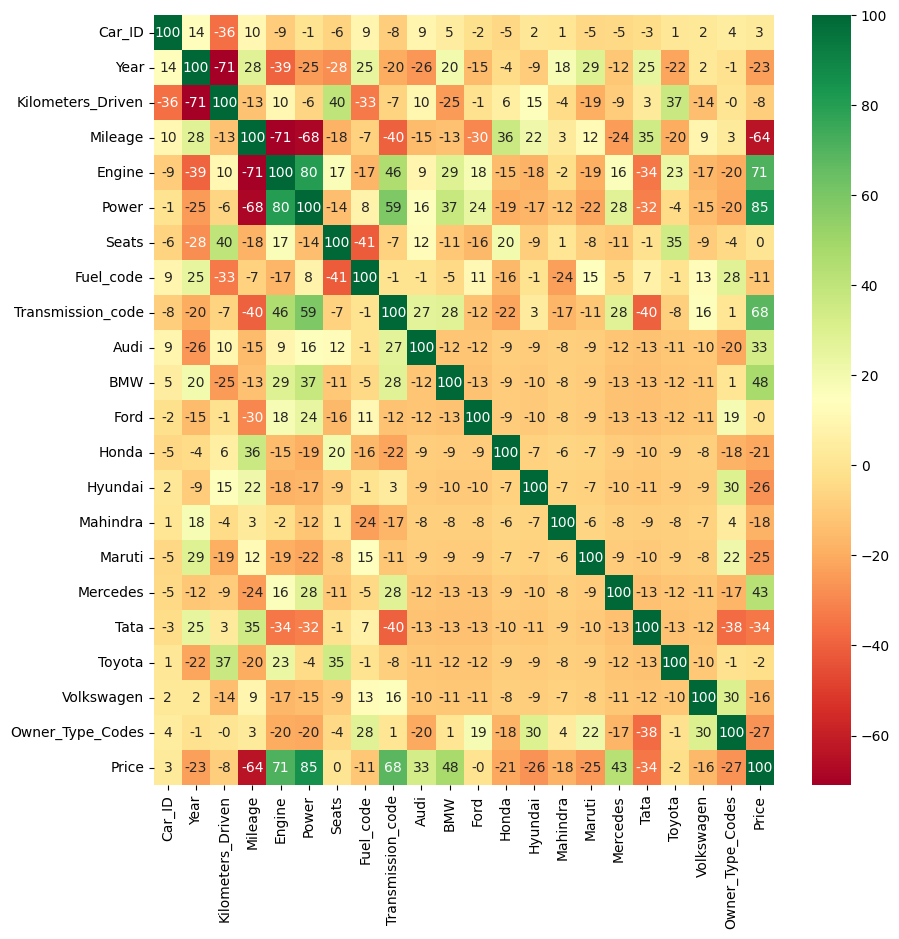

In [297]:
plt.figure(figsize = (10,10))
sns.heatmap(data = corr_df*100, annot = True, cmap = "RdYlGn", cbar = True, fmt='.0f')
plt.show()

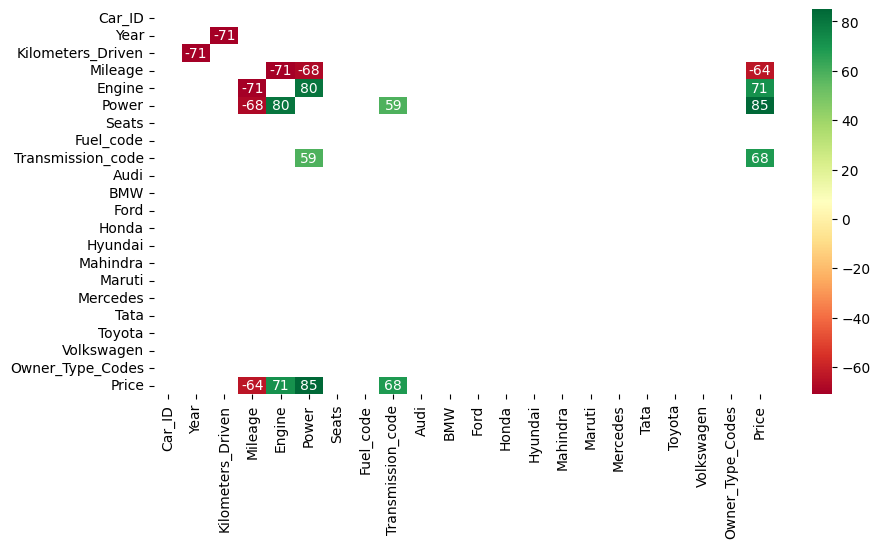

In [298]:
# Переглядаємо матрицю тільки для значень більше 0.5
plt.figure(figsize = (10,5))
sns.heatmap(data = corr_df[(np.abs(corr_df) >= 0.5) & (np.abs(corr_df) < 0.99)]*100, annot = True, cmap = "RdYlGn", cbar = True, fmt='.0f')
plt.show()

In [299]:
# Виводимо колонки що найбільше корелюють з цільовою змінною Price
corr_df[(np.abs(corr_df) >= 0.5) & (np.abs(corr_df) <= 0.99)].unstack().sort_values(ascending = False).Price


Power                0.849137
Engine               0.710561
Transmission_code    0.680731
Mileage             -0.638404
Car_ID                    NaN
Year                      NaN
Kilometers_Driven         NaN
Seats                     NaN
Fuel_code                 NaN
Audi                      NaN
BMW                       NaN
Ford                      NaN
Honda                     NaN
Hyundai                   NaN
Mahindra                  NaN
Maruti                    NaN
Mercedes                  NaN
Tata                      NaN
Toyota                    NaN
Volkswagen                NaN
Owner_Type_Codes          NaN
Price                     NaN
dtype: float64

Найбільшу корелцію з цільовою змінною `Price` мають колонки

* Power - `0.849137`
* Engine - `0.710561`
* Transmission_code - `0.680731`
* Mileage - `-0.638404`

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [300]:
# навчаємо модель та робимо передбачення
model = LinearRegression().fit(X_train, Y_train)

predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

predictions_test[:5]

array([2189574.86554523,  184953.1916545 ,  607518.78411261,
        473200.58591096,  549564.67982538])

In [301]:
# розраховуємо loss
rmse_train = root_mean_squared_error(Y_train, predictions_train)
rmse_test = root_mean_squared_error(Y_test, predictions_test)
rmse_train, rmse_test

(210293.57828151857, 258181.561120329)

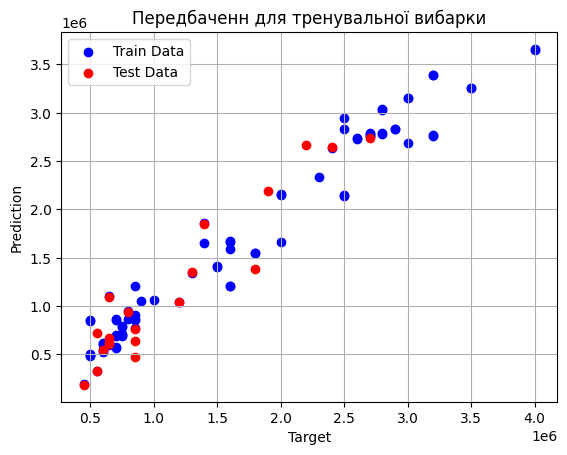

In [302]:
plt.scatter(Y_train, predictions_train , color='blue', label='Train Data')
plt.scatter(Y_test, predictions_test, color='red', label="Test Data")
plt.legend()
plt.xlabel('Target')
plt.ylabel('Prediction')
plt.title('Передбаченн для тренувальної вибарки')
plt.grid(True)

Модель робить наближені передбачення до очікуваних значень, проте для деяких екземпляпів вони відрізнються від target. Також маємо доволі великі значення мохибок, але для точніших восновкіх їх потрібно порівняти із похибками інших моделей

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [303]:
# Тренуємо scaler на числових даних та дивимось параметри
cols_to_scale = inputs.select_dtypes(include='number').columns
scaler = StandardScaler().fit(X_train[cols_to_scale])
scaler.mean_, scaler.var_

(array([5.3162500e+01, 2.0183625e+03, 2.8362500e+04, 1.7062500e+01,
        1.9107375e+03, 1.6688750e+02, 5.2250000e+00]),
 array([7.99036094e+02, 1.25609375e+00, 8.40810938e+07, 1.16335937e+01,
        4.31270294e+05, 6.62974984e+03, 5.49375000e-01]))

In [304]:
# Масштабуємо числові дані тренувального набору даних
scaled_X_train = scaler.transform(X_train[cols_to_scale])
scaled_X_test = scaler.transform(X_test[cols_to_scale])

scaled_X_train[:3]

array([[ 1.09092769,  0.56881254, -0.69387081,  0.27486176, -0.62849114,
        -0.23196684, -0.30356247],
       [ 0.10038127, -0.32344242, -0.03953291, -0.01832412,  0.08719579,
         0.24701168, -0.30356247],
       [-0.92554181, -0.32344242, -0.03953291, -0.60469588,  0.1115596 ,
         0.9102127 , -0.30356247]])

In [305]:
# Дізсаємо дані категоріальних колонок
cat_cols = ['Fuel_code', 'Transmission_code'] + enc.categories_[0].tolist() + ['Owner_Type_Codes']
X_train_cat_data = X_train[cat_cols].values
X_test_cat_data = X_test[cat_cols].values

X_train_cat_data[:3]

array([[1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [306]:
# Поєднуємо числові та категоріальні колонки
X_train_scaled = np.concatenate((scaled_X_train, X_train_cat_data), axis=1)
X_test_scaled = np.concatenate((scaled_X_test, X_test_cat_data), axis=1)


In [307]:
# навчаємо модель та робимо передбачення
model = LinearRegression().fit(X_train_scaled, Y_train)

predictions_train_scaled = model.predict(X_train_scaled)
predictions_test_scaled = model.predict(X_test_scaled)

# розраховуємо loss
rmse_train = root_mean_squared_error(Y_train, predictions_train_scaled)
rmse_test = root_mean_squared_error(Y_test, predictions_test_scaled)
rmse_train, rmse_test

(210293.5782815185, 258181.56112032756)

In [308]:
weights_df = pd.DataFrame({
    'feature': np.append(cols_to_scale.tolist() + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
21,1,1.601956e+06
9,Audi,7.569974e+05
16,Mercedes,7.364157e+05
10,BMW,7.312208e+05
5,Power,4.967692e+05
8,Transmission_code,2.395294e+05
18,Toyota,1.243492e+05
20,Owner_Type_Codes,6.476399e+04
0,Car_ID,5.608685e+03
6,Seats,-2.148925e+03


З точки зору коефіцієнтв найвпливовішими є колнки 


* `Audi`	7.569974e+05 - якщо значення колонки 1 ціна збільшується
* `Mercedes`	7.364157e+05 - якщо значення колонки 1 ціна збільшується
* `BMW`	7.312208e+05 - якщо значення колонки 1 ціна збільшується
* `Power`	4.967692e+05 - зі збільшенням потіжності автомобіля ціна збільшується
* `Transmission_code`	2.395294e+05 - якщо тип трансмісії 'Automatic' ціна більше ніж коли 'Manual'

* `Fuel_code`	-3.678110e+05 - якщо тип палива 'Petrol' ціна нижча ніж коли 'Diesel'
* `Maruti`	-3.921028e+05 - якщо значення колонки 1 ціна зменшуєтьс
* `Hyundai`	-5.065820e+05 - якщо значення колонки 1 ціна зменшуєтьс
* `Mahindra`	-5.750372e+05 - якщо значення колонки 1 ціна зменшуєтьс


Напрямок впливу для всіх розглнутих зміних виглядає логічно, бренди Audi, Mercedes та BMW дорожчі ніж Maruri, Hyundai, Mahindra.
Тип трансмісії 'Automatic' дорожчий ніж 'Manual', а тип палива 'Diesel' дорожчий за 'Petrol'

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [365]:
model = sm.OLS(Y_train, sm.add_constant(X_train_scaled))
results = model.fit()

results.params

array([[ 1.09092769,  0.56881254, -0.69387081, ...,  0.        ,
         1.        ,  1.        ],
       [ 0.10038127, -0.32344242, -0.03953291, ...,  0.        ,
         0.        ,  0.        ],
       [-0.92554181, -0.32344242, -0.03953291, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.63307497, -0.32344242,  1.81442446, ...,  0.        ,
         0.        ,  1.        ],
       [-0.89016515,  0.56881254, -0.69387081, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.80791442,  0.56881254, -0.69387081, ...,  0.        ,
         0.        ,  0.        ]])

In [310]:
# Так як масштабовані дані не містять назв колонок створимо датафрем з відповіністю xi з результатів моделі назвам оригінальних колонок для кращого легшого розуміння результатів
param_names = results.params.index
new_param_names = ['intercept'] + cols_to_scale.tolist() + cat_cols # replace with your desired names
name_map = dict(zip(param_names, new_param_names))

df = pd.Series(name_map)
df

const            intercept
x1                  Car_ID
x2                    Year
x3       Kilometers_Driven
x4                 Mileage
x5                  Engine
x6                   Power
x7                   Seats
x8               Fuel_code
x9       Transmission_code
x10                   Audi
x11                    BMW
x12                   Ford
x13                  Honda
x14                Hyundai
x15               Mahindra
x16                 Maruti
x17               Mercedes
x18                   Tata
x19                 Toyota
x20             Volkswagen
x21       Owner_Type_Codes
dtype: object

In [311]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     68.35
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           2.01e-33
Time:                        19:50:54   Log-Likelihood:                -1094.0
No. Observations:                  80   AIC:                             2230.
Df Residuals:                      59   BIC:                             2280.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.468e+06   7.26e+04     20.235      0.0

In [319]:
results.pvalues[results.pvalues<=0.05]

const    3.150436e-28
x4       2.760048e-02
x6       1.343837e-08
x8       1.639420e-04
x9       1.022962e-02
x10      9.805822e-12
x11      1.425094e-11
x14      1.245777e-03
x15      1.226570e-03
x16      3.155922e-02
x17      9.836836e-12
x19      3.174811e-02
dtype: float64

p-value менше рівня стат. значущості 0.05 для коефіцієнті:

x4, x6, x8, x9, x10, x11, x14, x15, x16, x17, x19

In [360]:
cols = results.pvalues[results.pvalues<0.05].index
filtered_cols = df.loc[df.index.isin(cols)].drop('const', axis=0)
filtered_cols.values

array(['Mileage', 'Power', 'Fuel_code', 'Transmission_code', 'Audi',
       'BMW', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Toyota'],
      dtype=object)

Отже найбільш стат. значущими є колонки '`Mileage`', '`Power`', '`Fuel_code`', '`Transmission_code`', '`Audi`',
       '`BMW`', '`Hyundai`', '`Mahindra`', '`Maruti`', '`Mercedes`', '`Toyota`'.

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [347]:
X_train_scaled_under05 = pd.DataFrame(X_train_scaled, columns=X_train.columns.values)[filtered_cols.values]
X_train_scaled_under05.head()

,Mileage,Power,Fuel_code,Transmission_code,Audi,BMW,Hyundai,Mahindra,Maruti,Mercedes,Toyota
0,0.274862,-0.231967,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.018324,0.247012,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.604696,0.910213,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.274862,-0.784634,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.484254,0.910213,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [366]:
model_under05 = sm.OLS( Y_train, sm.add_constant(X_train_scaled_under05.values)).fit()
model_under05.params


const    1.347926e+06
x1      -9.871469e+04
x2       4.626079e+05
x3      -2.644347e+05
x4       2.546451e+05
x5       9.664675e+05
x6       1.060240e+06
x7      -3.073476e+05
x8      -2.859407e+05
x9      -1.178075e+05
x10      1.017277e+06
x11      2.597025e+05
dtype: float64

In [367]:
print(model_under05.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     129.2
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           4.53e-41
Time:                        22:14:37   Log-Likelihood:                -1098.0
No. Observations:                  80   AIC:                             2220.
Df Residuals:                      68   BIC:                             2248.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.348e+06   6.68e+04     20.180      0.0

Показники попередньої моделі:


* R-squared:                       0.959
* Adj. R-squared:                  0.945

Показника нової моделі:

* R-squared:                   0.954
* Adj. R-squared:              0.947

Значення коефіцієнта детермінації R-squared трохи зменшилось, проте досі є доволі високим

Значення Adj. R-squared трохи збільшилось

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [361]:
cols = results.pvalues[results.pvalues<0.25].index
filtered_cols_under25 = df.loc[df.index.isin(cols)].drop('const', axis=0)
filtered_cols_under25.values

array(['Kilometers_Driven', 'Mileage', 'Power', 'Fuel_code',
       'Transmission_code', 'Audi', 'BMW', 'Ford', 'Hyundai', 'Mahindra',
       'Maruti', 'Mercedes', 'Toyota'], dtype=object)

In [362]:
X_train_scaled_under25 = pd.DataFrame(X_train_scaled, columns=X_train.columns.values)[filtered_cols_under25.values]
X_train_scaled_under25.head()

,Kilometers_Driven,Mileage,Power,Fuel_code,Transmission_code,Audi,BMW,Ford,Hyundai,Mahindra,Maruti,Mercedes,Toyota
0,-0.693871,0.274862,-0.231967,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.039533,-0.018324,0.247012,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.039533,-0.604696,0.910213,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.396692,0.274862,-0.784634,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.257646,-1.484254,0.910213,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [368]:
model_under25 = sm.OLS( Y_train, sm.add_constant(X_train_scaled_under25.values)).fit()
model_under25.params

const    1.410132e+06
x1      -7.811157e+04
x2      -1.218583e+05
x3       4.667184e+05
x4      -3.238180e+05
x5       2.356203e+05
x6       9.629063e+05
x7       9.762323e+05
x8      -5.119183e+04
x9      -2.646967e+05
x10     -3.520439e+05
x11     -1.685536e+05
x12      9.616181e+05
x13      3.095612e+05
dtype: float64

In [369]:
print(model_under25.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     115.3
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           4.40e-40
Time:                        22:15:00   Log-Likelihood:                -1094.8
No. Observations:                  80   AIC:                             2218.
Df Residuals:                      66   BIC:                             2251.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.41e+06   8.43e+04     16.718      0.0

Показники попередньої моделі:


* R-squared:                       0.959
* Adj. R-squared:                  0.945

Показника нової моделі:

* R-squared (uncentered):                   0.958
* Adj. R-squared (uncentered):              0.950

Значення коефіцієнта детермінації R-squared майже не змінилось

Значення Adj. R-squared трохи збільшилось

Для використання можна залишити останню модель, так як значення R-squared, хоч і зовсім трохи, менше ніж у першої моделі і все одно є доволі високим, і значення Adj. R-squared є найбіьлшим з усіх трьох моделей